In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df_CF_task2_aggregate = pd.read_csv("Turkish_Gezi_protest/CF_aggreate_best_answer_report_20_05_2018.csv")
df_CF_task1_aggregate = pd.read_csv("Turkish_Gezi_protest/CF_Task1_aggregated_best_answer_21_05_2018.csv")

In [7]:
print('cf task1 all gudgments',len(df_CF_task1_aggregate))
print('cf task2 all gudgments',len(df_CF_task2_aggregate))

cf task1 all gudgments 1197
cf task2 all gudgments 1440


In [81]:
print('cf task1 all gudgments',len(df_CF_task1_aggregate.drop_duplicates()))
print('cf task2 all gudgments',len(df_CF_task2_aggregate.drop_duplicates()))

cf task1 all gudgments 1197
cf task2 all gudgments 1197


In [9]:
len(df_CF_task1_aggregate.columns)

16

In [10]:
len(df_CF_task2_aggregate.columns)

15

In [11]:
df_CF_task1_aggregate.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence',
       'is_this_tweet_related_to_turkish_protests_2013',
       'is_this_tweet_related_to_turkish_protests_2013:confidence',
       'orig__golden', 'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold', 'label',
       'text'],
      dtype='object')

In [12]:
df_CF_task2_aggregate.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence',
       'is_this_tweet_related_to_turkish_protests_2013',
       'is_this_tweet_related_to_turkish_protests_2013:confidence',
       'created_at',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold',
       'id', 'is_this_tweet_related_to_turkish_protests_2013_gold',
       'proccd_text', 'text'],
      dtype='object')

In [14]:
df_CF_task1_aggregate.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest',
                             'is_this_tweet_related_to_turkish_protests_2013:confidence': 'protest_confidence',
                               'is_this_tweet_related_to_turkish_protests_2013_gold': 'protest_gold',
        'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest': 'violence',
          'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence': 'violence_confidence',
           'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold':'violence_gold'}, inplace =True)

In [15]:
df_CF_task2_aggregate.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest',
                             'is_this_tweet_related_to_turkish_protests_2013:confidence': 'protest_confidence',
                               'is_this_tweet_related_to_turkish_protests_2013_gold': 'protest_gold',
        'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest': 'violence',
          'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence': 'violence_confidence',
           'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold':'violence_gold'}, inplace =True)

In [16]:
df_CF_task1_aggregate.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'violence', 'violence_confidence', 'protest',
       'protest_confidence', 'orig__golden', 'created_at', 'violence_gold',
       'id', 'protest_gold', 'label', 'text'],
      dtype='object')

In [17]:
df_CF_task2_aggregate.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'violence', 'violence_confidence', 'protest',
       'protest_confidence', 'created_at', 'violence_gold', 'id',
       'protest_gold', 'proccd_text', 'text'],
      dtype='object')

In [19]:
df_CF_task1_aggregate = df_CF_task1_aggregate[['_unit_id', '_golden', '_trusted_judgments', 'violence', 'violence_confidence',
                                              'violence_gold', 'protest', 'protest_confidence', 'protest_gold',
                                              'id', 'text', 'created_at']]

In [20]:
df_CF_task2_aggregate = df_CF_task1_aggregate[['_unit_id', '_golden', '_trusted_judgments', 'violence', 'violence_confidence',
                                              'violence_gold', 'protest', 'protest_confidence', 'protest_gold',
                                              'id', 'text', 'created_at']]

In [21]:
df_CF_combines_aggregate = pd.concat([df_CF_task1_aggregate, df_CF_task2_aggregate])

In [93]:
df_CF_combines_aggregate.drop_duplicates().to_csv('Turkish_Gezi_protest/CF_combined_aggreagated_tasks_21_05_2018.csv')

In [22]:
len(df_CF_combines_aggregate)

2394

In [95]:
len(df_CF_combines_aggregate.drop_duplicates())

1197

In [23]:
df_CF_combines_aggregate.count()

_unit_id               2394
_golden                2394
_trusted_judgments     2394
violence                994
violence_confidence    1366
violence_gold            94
protest                2394
protest_confidence     2394
protest_gold            202
id                     2394
text                   2394
created_at             2394
dtype: int64

In [24]:
df_CF_combines_aggreagte_test_questions = df_CF_combines_aggregate[df_CF_combines_aggregate['_golden']==True]

In [25]:
df_CF_aggregate_finalized = df_CF_combines_aggregate[df_CF_combines_aggregate['_golden']!=True]

In [26]:
print('test_questions', len(df_CF_combines_aggreagte_test_questions))
print('finalized', len(df_CF_aggregate_finalized))

test_questions 250
finalized 2144


In [83]:
print('test_questions', len(df_CF_combines_aggreagte_test_questions.drop_duplicates()))
print('finalized', len(df_CF_aggregate_finalized.drop_duplicates()))

test_questions 125
finalized 1072


In [27]:
len(df_CF_combines_aggreagte_test_questions.drop_duplicates())

125

In [84]:
df_CF_combines_aggreagte_test_questions = df_CF_combines_aggreagte_test_questions.drop_duplicates()
df_CF_aggregate_finalized = df_CF_aggregate_finalized.drop_duplicates()

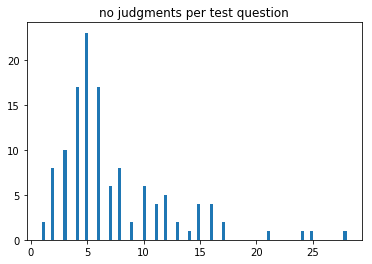

In [85]:
plt.hist(df_CF_combines_aggreagte_test_questions._trusted_judgments,100)
plt.title('no judgments per test question')
plt.show()

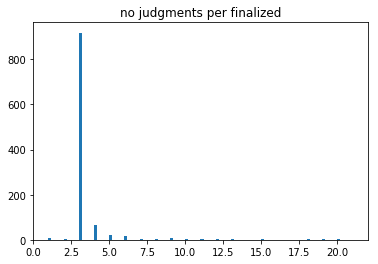

In [86]:
plt.hist(df_CF_aggregate_finalized._trusted_judgments,100)
plt.title('no judgments per finalized')
plt.show()

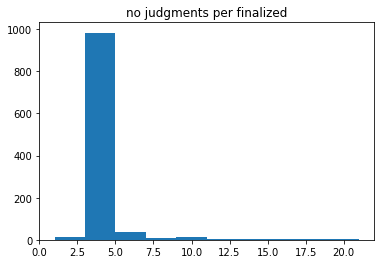

In [87]:
bins = list(np.arange(1,23,2))
plt.hist(df_CF_aggregate_finalized._trusted_judgments,bins=bins)
plt.title('no judgments per finalized')
plt.show()

In [88]:
print(df_CF_aggregate_finalized._trusted_judgments.unique())

[ 3  5  4  6 15 14 20 18 19 11 13  8 17 12 21 10  9  7  1  2]


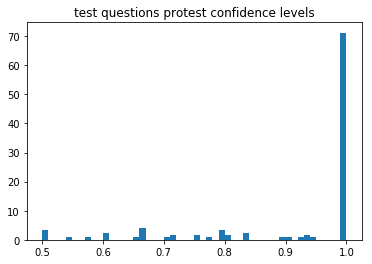

In [89]:
plt.hist(df_CF_combines_aggreagte_test_questions['protest_confidence'],50, density=1)
plt.title('test questions protest confidence levels')
plt.show()

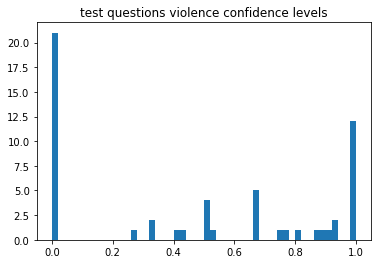

In [90]:
plt.hist(df_CF_combines_aggreagte_test_questions['violence_confidence'].dropna(),50)
plt.title('test questions violence confidence levels')
plt.show()

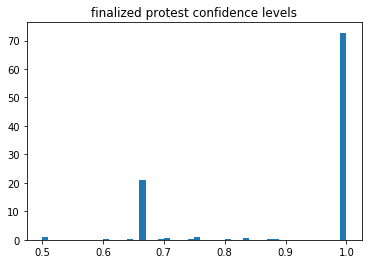

In [91]:
plt.hist(df_CF_aggregate_finalized['protest_confidence'],50, density=1)
plt.title('finalized protest confidence levels')
plt.show()

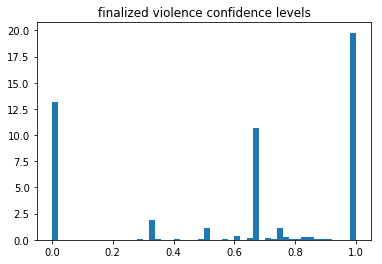

In [92]:
plt.hist(df_CF_aggregate_finalized['violence_confidence'].dropna(),50, density=1)
plt.title('finalized violence confidence levels')
plt.show()